In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

### From Darksky

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import time

### Find UV

In [3]:
def get_uv(driver,lat,lon,dat,ticks):
    driver.get(f'https://darksky.net/details/{lat},{lon}/{dat}/us12/en')
    uv = []
    for tick in ticks:
        hour = driver.find_element_by_xpath(f'//span[{tick}]')
        ActionChains(driver).move_to_element(hour).click(hour).perform()
        nums = driver.find_elements_by_class_name('num')
        try:
            uv.append(int(nums[7].text))
        except:
            uv.append(0)
    return uv

In [4]:
ticks1 = [
    '@class="even first" and @style="left: 0px;"',
    '@class="odd second" and @style="left: 33.3333px;"',
    '@class="even" and @style="left: 66.6667px;"',
    '@class="odd" and @style="left: 100px;"',
    '@class="even" and @style="left: 133.333px;"',
    '@class="odd" and @style="left: 166.667px;"',
    '@class="even" and @style="left: 200px;"',
    '@class="odd" and @style="left: 233.333px;"',
    '@class="even" and @style="left: 266.667px;"',
    '@class="odd" and @style="left: 300px;"',
    '@class="even" and @style="left: 333.333px;"',
    '@class="odd" and @style="left: 366.667px;"',
    '@class="even" and @style="left: 400px;"',
    '@class="odd" and @style="left: 433.333px;"',
    '@class="even" and @style="left: 466.667px;"',
    '@class="odd" and @style="left: 500px;"',
    '@class="even" and @style="left: 533.333px;"',
    '@class="odd" and @style="left: 566.667px;"',
    '@class="even" and @style="left: 600px;"',
    '@class="odd" and @style="left: 633.333px;"',
    '@class="even" and @style="left: 666.667px;"',
    '@class="odd" and @style="left: 700px;"',
    '@class="even" and @style="left: 733.333px;"',
    '@class="odd" and @style="left: 766.667px;"',
]

In [5]:
ticks2 = [
    '@class="even first" and @style="left: 0px;"',
    '@class="odd second" and @style="left: 34.7826px;"',
    '@class="even" and @style="left: 69.5652px;"',
    '@class="odd" and @style="left: 104.348px;"',
    '@class="even" and @style="left: 139.13px;"',
    '@class="odd" and @style="left: 173.913px;"',
    '@class="even" and @style="left: 208.696px;"',
    '@class="odd" and @style="left: 243.478px;"',
    '@class="even" and @style="left: 278.261px;"',
    '@class="odd" and @style="left: 313.043px;"',
    '@class="even" and @style="left: 347.826px;"',
    '@class="odd" and @style="left: 382.609px;"',
    '@class="even" and @style="left: 417.391px;"',
    '@class="odd" and @style="left: 452.174px;"',
    '@class="even" and @style="left: 486.957px;"',
    '@class="odd" and @style="left: 521.739px;"',
    '@class="even" and @style="left: 556.522px;"',
    '@class="odd" and @style="left: 591.304px;"',
    '@class="even" and @style="left: 626.087px;"',
    '@class="odd" and @style="left: 660.87px;"',
    '@class="even" and @style="left: 695.652px;"',
    '@class="odd" and @style="left: 730.435px;"',
    '@class="even" and @style="left: 765.217px;"',
]

### Single site over date range
- San Luis Obispo solar field (SLO)
- From march 

In [57]:
early_date = '03/07/2020'
later_date = '03/09/2020'

dates = pd.date_range(early_date, later_date).tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]

In [61]:
driver = webdriver.Chrome(ChromeDriverManager().install())

uv_list = []

for date in dates:
    try:
        nu_uv = get_uv(driver,str(35.376175),str(-120.061942),date,ticks1)
        hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
    except:
        nu_uv = get_uv(driver,str(35.376175),str(-120.061942),date,ticks2)
        hours = pd.date_range(start=date+' 00:01:00',end=date+' 23:00:00', periods=23)
    nu_df = pd.DataFrame({'date':hours,'uv':nu_uv})
    uv_list.append(nu_df)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [36]:
slo_uv = pd.concat(uv_list)

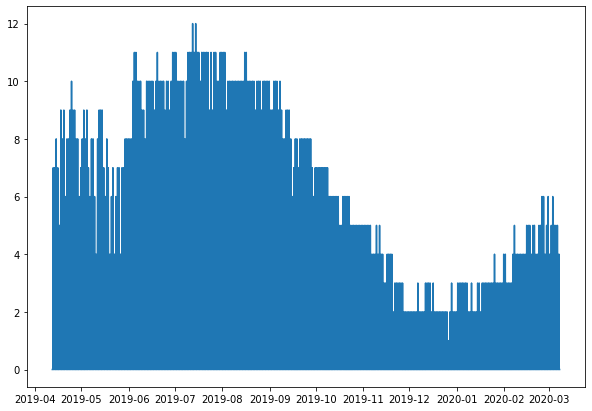

In [41]:
plt.figure(figsize=(10,7))
plt.plot(slo_uv['date'],slo_uv['uv'])

In [42]:
slo_uv.to_csv('datasets/time_series/slo_uv.csv',index=False)

In [24]:
uvdf = pd.concat(uv_list)
uvdf.shape

(240, 2)

### Get power plant weather data

In [6]:
plants = pd.read_csv('datasets/California_Power_Plants.csv')

In [7]:
solar = plants[(plants['General_Fuel']=='Solar') & (plants['Status']=='Operating')]
print(solar.shape)

(849, 56)


In [8]:
big_solar = solar[solar['MW']>=50]
big_solar.shape

(61, 56)

In [9]:
big_solar.reset_index(inplace=True,drop=True)
big_solar.head()

,OBJECTID_12_13,Plant_ID,Plant_Alias,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,STEP_License_Status,...,Operation_Job,Property_Tax,Capacity_Factor,Income_Percent,Project_Location,Creator,Creator_Date,Last_Editor,Last_Editor_Date,GlobalID
0,349,S0237,NaN,Alpine Solar,66.0,163521.0,163521.0,Solar,Operating,NaN,...,NaN,NaN,0.282057,85.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,5726cb60-2689-4c26-9ccf-eccfce9fb6fb
1,350,S0241,AV Solar Ranch One Project,Antelope Valley Solar Ranch 1,250.0,630482.0,606235.0,Solar,Operating,NaN,...,NaN,NaN,0.276063,85.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,20f8c61f-dc1e-4722-bfa2-5bd0f2543b5e
2,413,S0552,NaN,Antelope DSR 1 - Big Sky Solar 1,50.0,132500.0,132459.0,Solar,Operating,NaN,...,NaN,NaN,0.301592,129.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,0ed24308-bbac-4a25-a584-fb93fada30c6
3,416,S0558,NaN,Solverde 1,85.0,224039.0,223914.0,Solar,Operating,NaN,...,NaN,NaN,0.299896,129.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,9618c687-efba-49da-9607-58839834367e
4,486,S0532,NaN,Henrietta Solar Facility,100.0,251373.0,251373.0,Solar,Operating,NaN,...,NaN,NaN,0.286171,57.0,Low Income and Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,f2893125-f403-46a6-95bf-3f799b705b61


In [10]:
early_date = '03/15/2020'
later_date = '04/15/2020'

dates = pd.date_range(early_date, later_date).tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]

In [12]:
driver = webdriver.Chrome(ChromeDriverManager().install())

df_list = []

for i in range(big_solar.shape[0]):
    pid = big_solar['Plant_ID'][i]
    lat = big_solar['Latitude'][i]
    lon = big_solar['Longitude'][i]
    
    uv_list = []
    hr_list = []
    
    for date in dates:
        try:
            nu_uv = get_uv(driver,str(lat),str(lon),date,ticks1)
            hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
            uv_list.extend(nu_uv)
            hr_list.extend(hours)
        except:
            try:
            
                time.sleep(5)
                nu_uv = get_uv(driver,str(lat),str(lon),date,ticks1)
                hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
                uv_list.extend(nu_uv)
                hr_list.extend(hours)
            
            except:
            
                time.sleep(5)
                nu_uv = get_uv(driver,str(lat),str(lon),date,ticks2)
                hours = pd.date_range(start=date+' 01:00:00',end=date+' 23:00:00', periods=23)
                uv_list.extend(nu_uv)
                hr_list.extend(hours)
            
    nu_df = pd.DataFrame({'date':hr_list,pid:uv_list})

    if i == 0:
        all_df = nu_df.copy()
    else:
        all_df = all_df.merge(nu_df,how='outer',on='date')

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [18]:
all_df.to_csv('datasets/time_series/solar_test.csv',index=False)

### Combine plant capacity with UV index

In [30]:
plants = pd.read_csv('datasets/California_Power_Plants.csv')
solar = plants[(plants['General_Fuel']=='Solar') & (plants['Status']=='Operating')]

In [37]:
uv_output = all_df.copy()

for col in all_df.columns:
    if col != 'date':
        uv_output[col] = all_df[col]*int(plants[plants['Plant_ID']==col]['MW'])

In [43]:
uv_output.to_csv('datasets/time_series/solar_test.csv',index=False)

In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

wind = []
uv = []

for tick in ticks:
    hour = driver.find_element_by_xpath(f'//span[{tick}]')
    ActionChains(driver).move_to_element(hour).click(hour).perform()
    nums = driver.find_elements_by_class_name('num')
    try:
        wind.append(int(nums[3].text))
    except:
        wind.append(0)
    try:
        uv.append(int(nums[7].text))
    except:
        uv.append(0)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


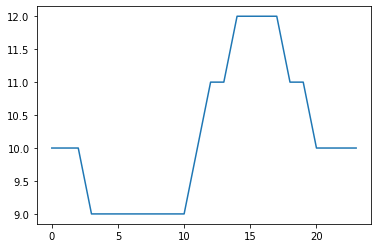

In [5]:
plt.plot(wind)

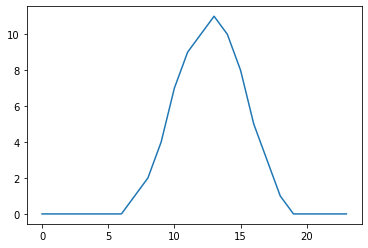

In [6]:
plt.plot(uv)

In [7]:
len(uv)

24

In [57]:
solar[solar['MW']>=20]['MW'].sum()/solar['MW'].sum()

0.8578307578326047